In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import os
from surprise import Reader
import pandas as pd
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection import train_test_split

from surprise.accuracy import rmse
from surprise.accuracy import mae

from surprise import KNNWithMeans
from surprise.prediction_algorithms import NMF
from surprise.prediction_algorithms import SVD

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
file_path = 'ml-latest-small/ratings.csv'

dataset = pd.read_csv(file_path)

users = dataset['userId'].values
movies = dataset['movieId'].values
ratings = dataset['rating'].values

movie_set = set(movies)
user_set = set(users)

df = pd.DataFrame.pivot_table(dataset,index='userId', columns='movieId')

total_row = df.shape[0]
total_col = df.shape[1]


## Question 1: 


In [25]:
available_ratings = df.count().sum()
print("Available Ratings: ",available_ratings)

Available Ratings:  100836


In [28]:
sparsity = available_ratings/(total_row*total_col)
print("Sparsity = " + "{:.3%}".format(sparsity))

Sparsity = 1.700%


## Question 2: 

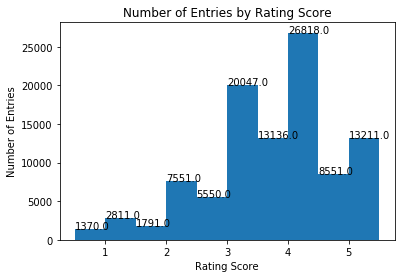

In [30]:
arr = plt.hist(ratings, bins = np.arange(0.5,6,0.5), align='mid')
for i in np.arange(0,10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.title('Number of Entries by Rating Score')
plt.ylabel('Number of Entries')
plt.xlabel('Rating Score')
plt.show()

In [31]:
unique, counts = np.unique(dataset.movieId, return_counts=True)
mydict = dict(zip(unique, counts))
mydict_sorted = sorted(mydict.items(), key=lambda x: x[1], reverse=True)
movieID_sorted = np.asarray(mydict_sorted)
subset1 = movieID_sorted[movieID_sorted[:,1] == 1]
len(subset1)

3446

## Question 3: 


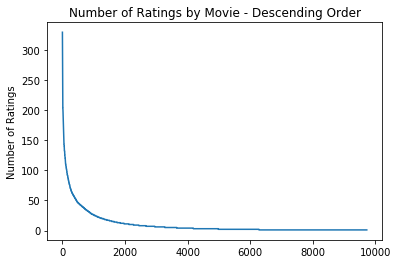

In [33]:
plt.plot(movieID_sorted[:,1])
plt.title('Number of Ratings by Movie - Descending Order')
plt.ylabel('Number of Ratings')
plt.show()

In [34]:
unique, counts = np.unique(dataset.userId, return_counts=True)
mydict = dict(zip(unique, counts))
mydict_sorted = sorted(mydict.items(), key=lambda x: x[1], reverse=True)
userID_sorted = np.asarray(mydict_sorted)
subset2 = userID_sorted[userID_sorted[:,1] <= 50]
len(subset2)

232

## Question 4: 


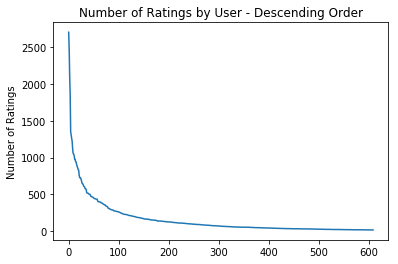

In [36]:
plt.plot(userID_sorted[:,1])
plt.title('Number of Ratings by User - Descending Order')
plt.ylabel('Number of Ratings')
plt.show()

## Question 5, 6: 

In [17]:
def find_element_in_list(element, list_element):
    try:
        index_element = []
        if type(list_element) is not np.ndarray:
            np_array_list_element = np.array(list_element)
            index_element = np.where(np_array_list_element == element)[0]
        return index_element
    except ValueError:
        return None

movieIds = movies.tolist()
uniqueMovieId, uniqueMovieIdCount = np.unique(movieIds, return_counts = True)    
    
variances = []
for i in range(len(uniqueMovieId)): 
    movieIndex = find_element_in_list(uniqueMovieId[i], movieIds)
    movieScores = []
    for j in range(len(movieIndex)): 
        movieScores.append(float(ratings[movieIndex[j]]))
    variance = np.var(movieScores)
    variances.append(variance)

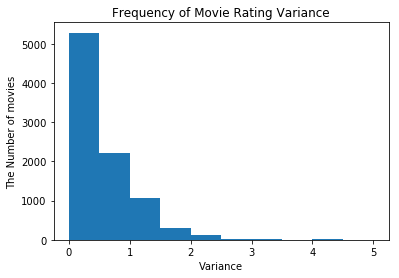

In [18]:
plt.hist(variances, bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], align='mid')
plt.title("Frequency of Movie Rating Variance")
plt.ylabel("The Number of movies")
plt.xlabel("Variance")
plt.show()

## Question 10: 


In [49]:
file_path = 'ml-latest-small/ratings.csv'
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader=reader)

full_mae = []
full_rmse = []

sim_options = {'name': 'pearson', 'user_based': True}
k = range(2,101,2)

for i in k:
    result = cross_validate(KNNWithMeans(k=i, sim_options=sim_options), data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
    full_mae.append(np.mean(result['test_mae']))
    full_rmse.append(np.mean(result['test_rmse']))

    

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0133  1.0243  1.0192  1.0268  1

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8964  0.8818  0.8954  0.8934  0.8919  0.8884  0.8946  0.8897  0.9040  0.90

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8843  0.8927  0.8804  0.8846  0.8935  0.8834  0.8958  0.8921  0.8797  0.89

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8967  0.8954  0.8791  0.8920  0.8874  0.8940  0.8859  0.8822  0.8953  0.88

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8743  0.9053  0.8860  0.8980  0.8704  0.8981  0.8966  0.8920  0.8898  0.88

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8917  0.8882  0.8921  0.8977  0.8952  0.8958  0.8775  0.8953  0.8812  0.87

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8935  0.8898  0.8987  0.8988  0.8879  0.8994  0.8873  0.8890  0.8824  0.87

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8880  0.8859  0.8997  0.8859  0.8854  0.8842  0.8993  0.8844  0.8922  0.89

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8821  0.8772  0.9025  0.8966  0.8880  0.8850  0.8852  0.8947  0.8881  0.90

## Question 11: 


In [50]:
print("Best k for RMSE: ", k[np.argmin(full_rmse)])
print("RMSE for best k: %0.4f " %  np.min(full_rmse))
print("Best k for MAE: ", k[np.argmin(full_mae)])
print("MAE for best k: %0.4f " % np.min(full_mae))

Best k for RMSE:  68
RMSE for best k: 0.8880 
Best k for MAE:  46
MAE for best k: 0.6762 


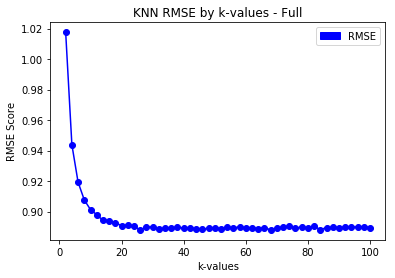

In [51]:
k = range(2,101,2)

plt.plot(k, full_rmse, 'b-o')
plt.xlabel('k-values')
plt.ylabel('RMSE Score')
plt.title("KNN RMSE by k-values - Full")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

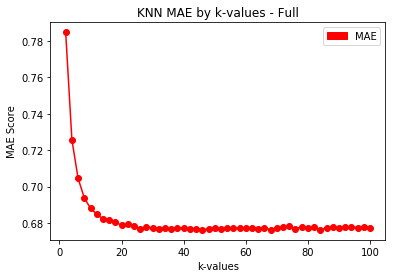

In [52]:
plt.plot(k, full_mae, 'r-o')
plt.xlabel('k-values')
plt.ylabel('MAE Score')
plt.title("KNN MAE by k-values - Full")
red_patch = mpatches.Patch(color='red', label='MAE')
plt.legend(handles=[red_patch])
plt.show()

In [53]:
data.raw_ratings

[('1', '1', 4.0, '964982703'),
 ('1', '3', 4.0, '964981247'),
 ('1', '6', 4.0, '964982224'),
 ('1', '47', 5.0, '964983815'),
 ('1', '50', 5.0, '964982931'),
 ('1', '70', 3.0, '964982400'),
 ('1', '101', 5.0, '964980868'),
 ('1', '110', 4.0, '964982176'),
 ('1', '151', 5.0, '964984041'),
 ('1', '157', 5.0, '964984100'),
 ('1', '163', 5.0, '964983650'),
 ('1', '216', 5.0, '964981208'),
 ('1', '223', 3.0, '964980985'),
 ('1', '231', 5.0, '964981179'),
 ('1', '235', 4.0, '964980908'),
 ('1', '260', 5.0, '964981680'),
 ('1', '296', 3.0, '964982967'),
 ('1', '316', 3.0, '964982310'),
 ('1', '333', 5.0, '964981179'),
 ('1', '349', 4.0, '964982563'),
 ('1', '356', 4.0, '964980962'),
 ('1', '362', 5.0, '964982588'),
 ('1', '367', 4.0, '964981710'),
 ('1', '423', 3.0, '964982363'),
 ('1', '441', 4.0, '964980868'),
 ('1', '457', 5.0, '964981909'),
 ('1', '480', 4.0, '964982346'),
 ('1', '500', 3.0, '964981208'),
 ('1', '527', 5.0, '964984002'),
 ('1', '543', 4.0, '964981179'),
 ('1', '552', 4.0, 

In [54]:
movie_ratings = {}
for row in data.raw_ratings:
    if row[1] not in movie_ratings:
        movie_ratings[row[1]] = []
    movie_ratings[row[1]].append(row[2])
    
popular_movie = [x for x in movie_ratings if len(movie_ratings[x]) > 2]
unpopular_movie = [x for x in movie_ratings if len(movie_ratings[x]) <= 2]
variance_movie = [x for x in movie_ratings if (len(movie_ratings[x]) >=5 and np.var(movie_ratings[x])>=2)]

In [55]:
print(len(popular_movie))

4980


In [56]:
len(unpopular_movie)

4744

In [68]:
len(variance_movie)

40

## Questions 12-14

In [58]:
kf = KFold(n_splits=10)

pop_rmse = []
pop_mae = []

k = range(2,101,2)
for i in k:
    rmse_score = []
    mae_score = []
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in popular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    pop_rmse.append(sum(rmse_score) / len(rmse_score))
    pop_mae.append(sum(mae_score)/len(mae_score))
    print('\nk = %d' % i)
    print('Average RMSE = %.4f' % (sum(rmse_score) /len(rmse_score)))
    print('Average MAE = %.4f\n' % (sum(mae_score)/len(mae_score)))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0042
MAE:  0.7796
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0135
MAE:  0.7847
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0031
MAE:  0.7731
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0056
MAE:  0.7729
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0131
MAE:  0.7847
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0067
MAE:  0.7800
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9990
MAE:  0.7711
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0181
MAE:  0.7837
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0148
MAE:  0.7853
Computing the pearson similarity matrix...
Done computing similarity matr

Done computing similarity matrix.
RMSE: 0.8707
MAE:  0.6628
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8786
MAE:  0.6710
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8719
MAE:  0.6690
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8972
MAE:  0.6860

k = 16
Average RMSE = 0.8771
Average MAE = 0.6697

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8799
MAE:  0.6682
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8801
MAE:  0.6699
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8818
MAE:  0.6733
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8774
MAE:  0.6684
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8832
MAE:  0.6726
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 0.8764
MAE:  0.6639
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8638
MAE:  0.6566
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8579
MAE:  0.6580
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8737
MAE:  0.6669
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8837
MAE:  0.6720
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8842
MAE:  0.6747
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8785
MAE:  0.6714
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8698
MAE:  0.6613

k = 32
Average RMSE = 0.8743
Average MAE = 0.6665

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8795
MAE:  0.6703
Computing the pearson similarity matrix...
Done computing simila

RMSE: 0.8703
MAE:  0.6637
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8677
MAE:  0.6576

k = 46
Average RMSE = 0.8735
Average MAE = 0.6654

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8810
MAE:  0.6696
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8704
MAE:  0.6620
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8778
MAE:  0.6651
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8703
MAE:  0.6664
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8802
MAE:  0.6732
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8728
MAE:  0.6656
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8765
MAE:  0.6660
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8691
MAE:  0.

Done computing similarity matrix.
RMSE: 0.8686
MAE:  0.6594
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8740
MAE:  0.6678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8698
MAE:  0.6649
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8673
MAE:  0.6627
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8759
MAE:  0.6697
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8715
MAE:  0.6667

k = 62
Average RMSE = 0.8726
Average MAE = 0.6652

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8790
MAE:  0.6646
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8745
MAE:  0.6673
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8750
MAE:  0.6654
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 0.8639
MAE:  0.6579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8747
MAE:  0.6662
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8688
MAE:  0.6654
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8732
MAE:  0.6669
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8832
MAE:  0.6704
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8837
MAE:  0.6694
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8727
MAE:  0.6621
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8672
MAE:  0.6632
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8674
MAE:  0.6600
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8788
MAE:  0.6725

k = 78
Avera

RMSE: 0.8661
MAE:  0.6579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8726
MAE:  0.6626
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8842
MAE:  0.6723
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8683
MAE:  0.6655

k = 92
Average RMSE = 0.8732
Average MAE = 0.6656

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8715
MAE:  0.6664
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8782
MAE:  0.6694
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8828
MAE:  0.6705
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8811
MAE:  0.6697
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8807
MAE:  0.6716
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8665
MAE:  0.

In [59]:
print("Best k for RMSE: ", k[np.argmin(pop_rmse)])
print("RMSE for best k: %0.4f " %  np.min(pop_rmse))
print("Best k for MAE: ", k[np.argmin(pop_mae)])
print("MAE for best k: %0.4f " % np.min(pop_mae))

Best k for RMSE:  42
RMSE for best k: 0.8720 
Best k for MAE:  68
MAE for best k: 0.6650 


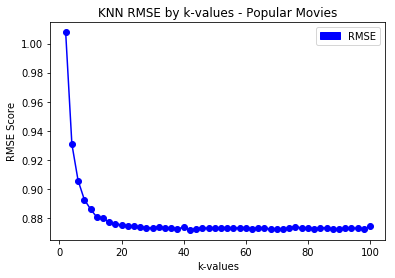

In [60]:
plt.plot(k, pop_rmse, 'b-o')
plt.xlabel('k-values')
plt.ylabel('RMSE Score')
plt.title("KNN RMSE by k-values - Popular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [61]:
kf = KFold(n_splits=10)

unpop_rmse = []
unpop_mae = []

k = range(2,101,2)
for i in k:
    rmse_score = []
    mae_score = []
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpopular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    unpop_rmse.append(sum(rmse_score) / len(rmse_score))
    unpop_mae.append(sum(mae_score)/len(mae_score))
    print('\nk = %d' % i)
    print('Average RMSE = %.4f' % (sum(rmse_score) /len(rmse_score)))
    print('Average MAE = %.4f\n' % (sum(mae_score)/len(mae_score)))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1684
MAE:  0.8978
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1261
MAE:  0.8765
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0870
MAE:  0.8418
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1259
MAE:  0.8675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1001
MAE:  0.8597
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1206
MAE:  0.8662
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1135
MAE:  0.8764
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1261
MAE:  0.8739
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1002
MAE:  0.8547
Computing the pearson similarity matrix...
Done computing similarity matr

Done computing similarity matrix.
RMSE: 1.0982
MAE:  0.8428
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0875
MAE:  0.8448
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1276
MAE:  0.8798
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0853
MAE:  0.8321

k = 16
Average RMSE = 1.1097
Average MAE = 0.8566

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1244
MAE:  0.8726
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0940
MAE:  0.8370
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1026
MAE:  0.8449
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0919
MAE:  0.8466
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1413
MAE:  0.8781
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.1030
MAE:  0.8646
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1397
MAE:  0.9026
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1345
MAE:  0.8741
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1243
MAE:  0.8622
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0727
MAE:  0.8281
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1959
MAE:  0.9255
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0927
MAE:  0.8389
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1013
MAE:  0.8682

k = 32
Average RMSE = 1.1158
Average MAE = 0.8642

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0619
MAE:  0.8263
Computing the pearson similarity matrix...
Done computing simila

RMSE: 1.1030
MAE:  0.8588
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1126
MAE:  0.8530

k = 46
Average RMSE = 1.1158
Average MAE = 0.8626

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0932
MAE:  0.8380
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1537
MAE:  0.8826
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0963
MAE:  0.8450
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1061
MAE:  0.8565
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1355
MAE:  0.8819
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1305
MAE:  0.8751
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1150
MAE:  0.8669
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0714
MAE:  0.

Done computing similarity matrix.
RMSE: 1.1061
MAE:  0.8542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1247
MAE:  0.8677
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0885
MAE:  0.8493
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0716
MAE:  0.8373
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0765
MAE:  0.8382
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1734
MAE:  0.9068

k = 62
Average RMSE = 1.1119
Average MAE = 0.8612

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1062
MAE:  0.8627
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0982
MAE:  0.8394
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0485
MAE:  0.8153
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.1687
MAE:  0.8990
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1466
MAE:  0.8918
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1206
MAE:  0.8813
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1324
MAE:  0.8774
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0682
MAE:  0.8082
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1066
MAE:  0.8531
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0827
MAE:  0.8331
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1047
MAE:  0.8542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1845
MAE:  0.9277
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0793
MAE:  0.8293

k = 78
Avera

RMSE: 1.1319
MAE:  0.8649
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0999
MAE:  0.8629
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1251
MAE:  0.8561
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1457
MAE:  0.8831

k = 92
Average RMSE = 1.1179
Average MAE = 0.8643

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0498
MAE:  0.7928
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1306
MAE:  0.8803
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0783
MAE:  0.8414
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1645
MAE:  0.9091
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0429
MAE:  0.8082
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1276
MAE:  0.

In [62]:
print("Best k for RMSE: ", k[np.argmin(unpop_rmse)])
print("RMSE for best k: %0.4f " %  np.min(unpop_rmse))
print("Best k for MAE: ", k[np.argmin(unpop_mae)])
print("MAE for best k: %0.4f " % np.min(unpop_mae))

Best k for RMSE:  72
RMSE for best k: 1.1053 
Best k for MAE:  60
MAE for best k: 0.8556 


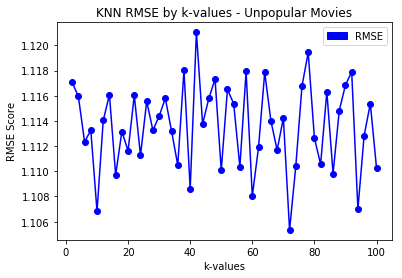

In [63]:
plt.plot(k, unpop_rmse, 'b-o')
plt.xlabel('k-values')
plt.ylabel('RMSE Score')
plt.title("KNN RMSE by k-values - Unpopular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [69]:
kf = KFold(n_splits=10)

var_rmse = []
var_mae = []

k = range(2,101,2)
for i in k:
    rmse_score = []
    mae_score = []
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in variance_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    var_rmse.append(sum(rmse_score) / len(rmse_score))
    var_mae.append(sum(mae_score)/len(mae_score))
    print('\nk = %d' % i)
    print('Average RMSE = %.4f' % (sum(rmse_score) /len(rmse_score)))
    print('Average MAE = %.4f\n' % (sum(mae_score)/len(mae_score)))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8024
MAE:  1.3744
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3772
MAE:  1.1165
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8449
MAE:  1.4818
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2589
MAE:  1.0209
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6559
MAE:  1.3518
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4585
MAE:  1.0156
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5998
MAE:  1.2233
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6360
MAE:  1.3807
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3275
MAE:  1.0137
Computing the pearson similarity matrix...
Done computing similarity matr

Done computing similarity matrix.
RMSE: 1.2721
MAE:  0.9549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4861
MAE:  1.1314
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6308
MAE:  1.2602
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5050
MAE:  1.2243

k = 16
Average RMSE = 1.5309
Average MAE = 1.2112

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5405
MAE:  1.1829
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5888
MAE:  1.2909
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0676
MAE:  0.8075
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5701
MAE:  1.1888
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6900
MAE:  1.4669
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.3188
MAE:  1.0271
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3168
MAE:  1.0827
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5739
MAE:  1.2929
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5221
MAE:  1.2182
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4903
MAE:  1.1313
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5953
MAE:  1.3237
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5819
MAE:  1.2623
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6276
MAE:  1.3398

k = 32
Average RMSE = 1.4997
Average MAE = 1.1989

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2225
MAE:  0.9291
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.4586
MAE:  1.2059

k = 46
Average RMSE = 1.5644
Average MAE = 1.2238

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6405
MAE:  1.2825
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5048
MAE:  1.2168
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4692
MAE:  1.1336
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8099
MAE:  1.3542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3999
MAE:  1.0413
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4578
MAE:  1.2208
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2599
MAE:  1.0291
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6421
MAE:  1.3956
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.3124
MAE:  1.0684
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.9630
MAE:  1.5088
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0967
MAE:  0.8779
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5260
MAE:  1.1755
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5432
MAE:  1.3184

k = 62
Average RMSE = 1.5272
Average MAE = 1.2277

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3642
MAE:  1.0853
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0351
MAE:  0.8591
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4756
MAE:  1.1508
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.0534
MAE:  1.6372
Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.2943
MAE:  1.0370
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.0380
MAE:  1.5975
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4643
MAE:  1.1422
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4044
MAE:  1.1418
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8585
MAE:  1.3657
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3417
MAE:  1.1264
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0550
MAE:  0.8284
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7121
MAE:  1.3864
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7390
MAE:  1.4443

k = 78
Average RMSE = 1.5624
Average MAE = 1.2459

Computing the pearson similarity matrix...
Done computing simila

Done computing similarity matrix.
RMSE: 1.7269
MAE:  1.4221
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3581
MAE:  1.0490

k = 92
Average RMSE = 1.5863
Average MAE = 1.2527

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6756
MAE:  1.2905
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3274
MAE:  1.1153
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5071
MAE:  1.2629
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4690
MAE:  1.1535
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7630
MAE:  1.3421
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4224
MAE:  1.0999
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3570
MAE:  1.0033
Computing the pearson similarity matrix...
Done computing simila

In [70]:
print("Best k for RMSE: ", k[np.argmin(var_rmse)])
print("RMSE for best k: %0.4f " %  np.min(var_rmse))
print("Best k for MAE: ", k[np.argmin(var_mae)])
print("MAE for best k: %0.4f " % np.min(var_mae))

Best k for RMSE:  40
RMSE for best k: 1.4311 
Best k for MAE:  40
MAE for best k: 1.1504 


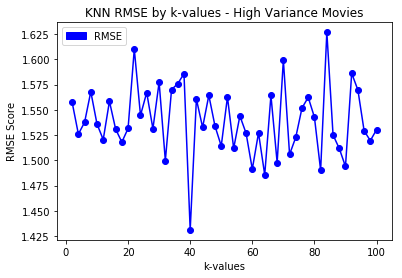

In [71]:
plt.plot(k, var_rmse, 'b-o')
plt.xlabel('k-values')
plt.ylabel('RMSE Score')
plt.title("KNN RMSE by k-values - High Variance Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

## Question 15: 

In [72]:
trainset, testset = train_test_split(data, test_size=.10)
algo = KNNWithMeans(k=20, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
actual_raw = [getattr(row, 'r_ui') for row in predictions]
predicted = [getattr(row, 'est') for row in predictions]

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [74]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1],'k--')
    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    plt.show()

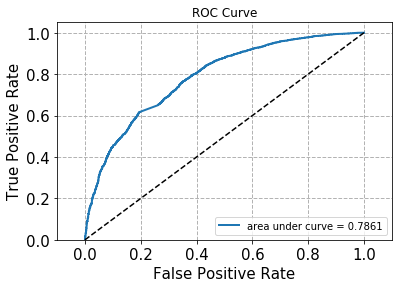

In [75]:
threshold = 2.5
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

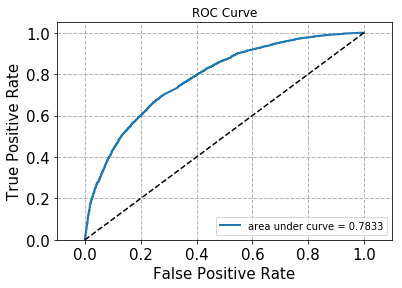

In [79]:
threshold = 3.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
kNN_fpr = fpr
kNN_tpr = tpr
plot_roc(fpr, tpr)

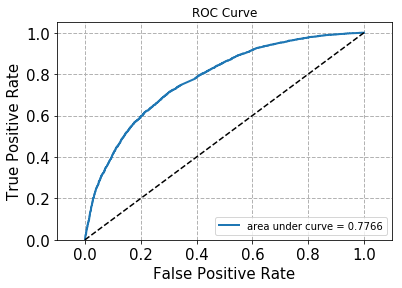

In [80]:
threshold = 3.5
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

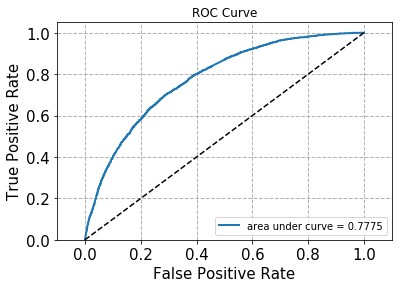

In [81]:
threshold = 4.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

## Question 17

In [82]:
full_mae_nmf = []
full_rmse_nmf = []
n_factors = range(2,51,2)
for i in n_factors:
    result = cross_validate(NMF(n_factors=i), data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
    full_mae_nmf.append(np.mean(result['test_mae']))
    full_rmse_nmf.append(np.mean(result['test_rmse']))

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1411  1.1411  1.1498  1.1300  1.1302  1.1584  1.1506  1.1434  1.1399  1.1437  1.1428  0.0083  
MAE (testset)     0.9622  0.9557  0.9692  0.9488  0.9495  0.9723  0.9729  0.9626  0.9540  0.9600  0.9607  0.0083  
Fit time          3.90    3.69    3.72    3.77    3.70    3.69    4.01    4.72    4.20    4.35    3.98    0.33    
Test time         0.06    0.29    0.05    0.05    0.05    0.05    0.06    0.06    0.05    0.12    0.08    0.07    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0449  1.0379  1.0348  1.0362  1.0309  1.0224  1.0496  1.0239  1.0315  1.0450  1.0357  0.0085  
MAE (testset)     0.8533  0.8473  0.8511  0.8495  0.8451  0.8348  0.8562  0.8345  0.8

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9466  0.9244  0.9468  0.9304  0.9379  0.9224  0.9212  0.9341  0.9202  0.9380  0.9322  0.0096  
MAE (testset)     0.7137  0.6984  0.7102  0.6991  0.7057  0.6961  0.6983  0.7025  0.6904  0.7081  0.7023  0.0068  
Fit time          8.35    8.51    8.45    8.69    8.53    8.47    8.47    8.43    8.33    8.38    8.46    0.10    
Test time         0.12    0.05    0.05    0.14    0.05    0.05    0.05    0.05    0.12    0.05    0.07    0.04    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9408  0.9332  0.9264  0.9322  0.9531  0.9433  0.9340  0.9300  0.9173  0.9376  0.9348  0.0093  
MAE (testset)     0.7101  0.7029  0.6985  0.7056  0.7157  0.7096  0.7047  0.7021  0.6

## Question 18: 

In [83]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(full_rmse_nmf)])
print("RMSE for best n_factors: %0.4f " %  np.min(full_rmse_nmf))
print("Best n_factors for MAE: ", n_factors[np.argmin(full_mae_nmf)])
print("MAE for best n_factors: %0.4f " % np.min(full_mae_nmf))

Best n_factors for RMSE:  16
RMSE for best n_factors: 0.9132 
Best n_factors for MAE:  22
MAE for best n_factors: 0.6933 


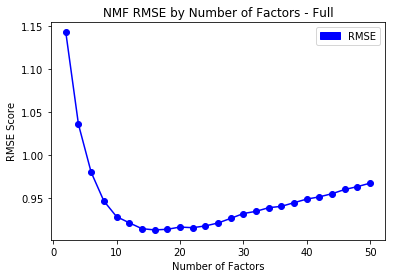

In [84]:
plt.plot(n_factors, full_rmse_nmf, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("NMF RMSE by Number of Factors - Full")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

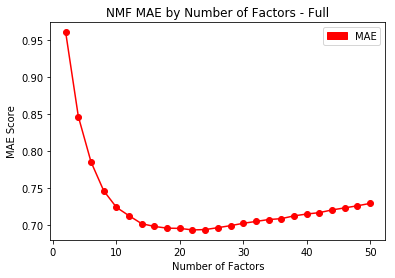

In [85]:
plt.plot(n_factors, full_mae_nmf, 'r-o')
plt.xlabel('Number of Factors')
plt.ylabel('MAE Score')
plt.title("NMF MAE by Number of Factors - Full")
red_patch = mpatches.Patch(color='red', label='MAE')
plt.legend(handles=[red_patch])
plt.show()

In [86]:
movies_path = 'ml-latest-small/movies.csv'
genre = pd.read_csv(movies_path)
print(genre.shape)
genre.head()

(9742, 3)


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [87]:
genre_only = genre.genres
genre_only_new = []
for i in range(0, len(genre_only)):
    rep = genre_only[i].replace("|",",")
    genre_only_new.append(rep)
    
one_list = ",".join(genre_only_new)
one_list_split = one_list.split(",")
unique_genres = set(one_list_split)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

## Questions 19-21

In [90]:
kf = KFold(n_splits=10)

pop_rmse_nmf = []
pop_mae_nmf = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = NMF(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in popular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    pop_rmse_nmf.append(sum(rmse_score) / len(rmse_score))
    pop_mae_nmf.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f' % (sum(rmse_score) /len(rmse_score)))


RMSE: 1.1364
MAE:  0.9581
RMSE: 1.1310
MAE:  0.9539
RMSE: 1.1463
MAE:  0.9687
RMSE: 1.1413
MAE:  0.9650
RMSE: 1.1384
MAE:  0.9621
RMSE: 1.1266
MAE:  0.9531
RMSE: 1.1362
MAE:  0.9648
RMSE: 1.1517
MAE:  0.9729
RMSE: 1.1386
MAE:  0.9627
RMSE: 1.1276
MAE:  0.9515

Number of Factors = 2
Average RMSE = 1.1374
RMSE: 1.0199
MAE:  0.8374
RMSE: 1.0399
MAE:  0.8564
RMSE: 1.0272
MAE:  0.8436
RMSE: 0.9984
MAE:  0.8204
RMSE: 1.0113
MAE:  0.8281
RMSE: 1.0200
MAE:  0.8371
RMSE: 1.0430
MAE:  0.8541
RMSE: 1.0279
MAE:  0.8427
RMSE: 1.0231
MAE:  0.8372
RMSE: 1.0183
MAE:  0.8367

Number of Factors = 4
Average RMSE = 1.0229
RMSE: 0.9594
MAE:  0.7701
RMSE: 0.9647
MAE:  0.7763
RMSE: 0.9596
MAE:  0.7710
RMSE: 0.9582
MAE:  0.7695
RMSE: 0.9566
MAE:  0.7677
RMSE: 0.9715
MAE:  0.7812
RMSE: 0.9745
MAE:  0.7831
RMSE: 0.9585
MAE:  0.7726
RMSE: 0.9701
MAE:  0.7774
RMSE: 0.9589
MAE:  0.7674

Number of Factors = 6
Average RMSE = 0.9632
RMSE: 0.9259
MAE:  0.7352
RMSE: 0.9312
MAE:  0.7374
RMSE: 0.9372
MAE:  0.7423
RMSE: 0

In [91]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(pop_rmse_nmf)])
print("RMSE for best n_factors: %0.4f " %  np.min(pop_rmse_nmf))
print("Best n_factors for MAE: ", n_factors[np.argmin(pop_mae_nmf)])
print("MAE for best n_factors: %0.4f " % np.min(pop_mae_nmf))

Best n_factors for RMSE:  16
RMSE for best n_factors: 0.8925 
Best n_factors for MAE:  22
MAE for best n_factors: 0.6798 


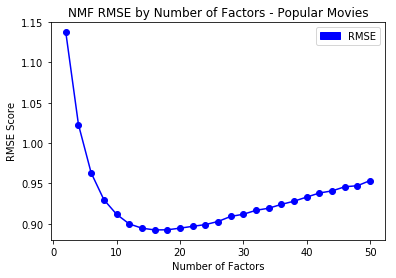

In [92]:
plt.plot(n_factors, pop_rmse_nmf, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("NMF RMSE by Number of Factors - Popular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [93]:
kf = KFold(n_splits=10)

unpop_rmse_nmf = []
unpop_mae_nmf = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = NMF(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpopular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    unpop_rmse_nmf.append(sum(rmse_score) / len(rmse_score))
    unpop_mae_nmf.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f\n' % (sum(rmse_score) /len(rmse_score)))

RMSE: 1.2207
MAE:  0.9558
RMSE: 1.1768
MAE:  0.9233
RMSE: 1.2606
MAE:  0.9959
RMSE: 1.1436
MAE:  0.8991
RMSE: 1.2435
MAE:  0.9877
RMSE: 1.2290
MAE:  0.9802
RMSE: 1.2124
MAE:  0.9618
RMSE: 1.2903
MAE:  1.0213
RMSE: 1.2653
MAE:  0.9939
RMSE: 1.2152
MAE:  0.9660

Number of Factors = 2
Average RMSE = 1.2258

RMSE: 1.2406
MAE:  0.9858
RMSE: 1.1968
MAE:  0.9517
RMSE: 1.1809
MAE:  0.9292
RMSE: 1.2013
MAE:  0.9454
RMSE: 1.1887
MAE:  0.9397
RMSE: 1.2436
MAE:  0.9715
RMSE: 1.2231
MAE:  0.9507
RMSE: 1.2359
MAE:  0.9744
RMSE: 1.2053
MAE:  0.9529
RMSE: 1.2127
MAE:  0.9542

Number of Factors = 4
Average RMSE = 1.2129

RMSE: 1.1828
MAE:  0.9205
RMSE: 1.2617
MAE:  1.0080
RMSE: 1.2543
MAE:  0.9811
RMSE: 1.2625
MAE:  1.0089
RMSE: 1.1322
MAE:  0.8867
RMSE: 1.1621
MAE:  0.9028
RMSE: 1.2305
MAE:  0.9559
RMSE: 1.2003
MAE:  0.9566
RMSE: 1.1917
MAE:  0.9407
RMSE: 1.1418
MAE:  0.8913

Number of Factors = 6
Average RMSE = 1.2020

RMSE: 1.1541
MAE:  0.9032
RMSE: 1.2058
MAE:  0.9404
RMSE: 1.1925
MAE:  0.9376
RMSE

In [94]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(unpop_rmse_nmf)])
print("RMSE for best n_factors: %0.4f " %  np.min(unpop_rmse_nmf))

Best n_factors for RMSE:  40
RMSE for best n_factors: 1.1630 


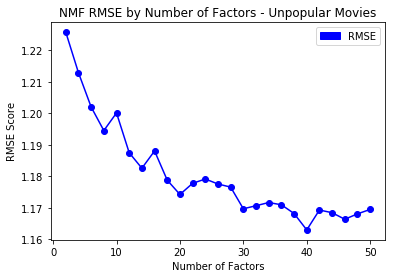

In [95]:
plt.plot(n_factors, unpop_rmse_nmf, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("NMF RMSE by Number of Factors - Unpopular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [97]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

var_rmse_nmf = []
var_mae_nmf = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = NMF(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in variance_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    var_rmse_nmf.append(sum(rmse_score) / len(rmse_score))
    var_mae_nmf.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f\n' % (sum(rmse_score) /len(rmse_score)))
    

RMSE: 1.7053
MAE:  1.4797
RMSE: 1.6892
MAE:  1.4118
RMSE: 1.7518
MAE:  1.5393
RMSE: 1.9629
MAE:  1.7742
RMSE: 1.6762
MAE:  1.4218
RMSE: 2.0192
MAE:  1.6105
RMSE: 1.5009
MAE:  1.2358
RMSE: 1.7693
MAE:  1.5281
RMSE: 1.7893
MAE:  1.4739
RMSE: 1.4769
MAE:  1.3064

Number of Factors = 2
Average RMSE = 1.7341

RMSE: 1.7946
MAE:  1.4851
RMSE: 1.6020
MAE:  1.3683
RMSE: 1.7954
MAE:  1.6359
RMSE: 1.8346
MAE:  1.4653
RMSE: 1.7502
MAE:  1.5144
RMSE: 1.5445
MAE:  1.3142
RMSE: 1.7417
MAE:  1.3047
RMSE: 1.5040
MAE:  1.2322
RMSE: 1.8274
MAE:  1.4017
RMSE: 1.6838
MAE:  1.4305

Number of Factors = 4
Average RMSE = 1.7078

RMSE: 1.8049
MAE:  1.4117
RMSE: 1.5376
MAE:  1.3541
RMSE: 1.6506
MAE:  1.2768
RMSE: 1.8487
MAE:  1.6029
RMSE: 2.0170
MAE:  1.6517
RMSE: 1.8076
MAE:  1.5037
RMSE: 1.3076
MAE:  0.9814
RMSE: 1.5953
MAE:  1.3482
RMSE: 1.6484
MAE:  1.3865
RMSE: 1.7514
MAE:  1.5222

Number of Factors = 6
Average RMSE = 1.6969

RMSE: 2.0774
MAE:  1.7462
RMSE: 1.8292
MAE:  1.5359
RMSE: 1.5453
MAE:  1.3735
RMSE

In [98]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(var_rmse_nmf)])
print("RMSE for best n_factors: %0.4f " %  np.min(var_rmse_nmf))

Best n_factors for RMSE:  20
RMSE for best n_factors: 1.6146 


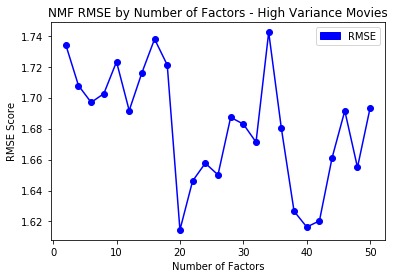

In [99]:
plt.plot(n_factors, var_rmse_nmf, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("NMF RMSE by Number of Factors - High Variance Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

## Question 22: 

In [101]:
trainset, testset = train_test_split(data, test_size=.10)
algo = NMF(n_factors=22)

algo.fit(trainset)
predictions = algo.test(testset)

actual_raw = [getattr(row, 'r_ui') for row in predictions]
predicted = [getattr(row, 'est') for row in predictions]

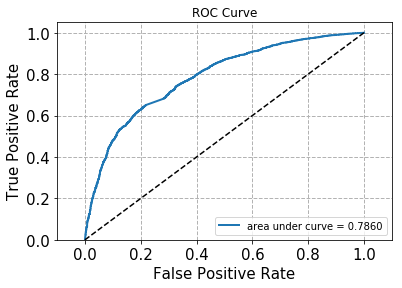

In [103]:
threshold = 2.5
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

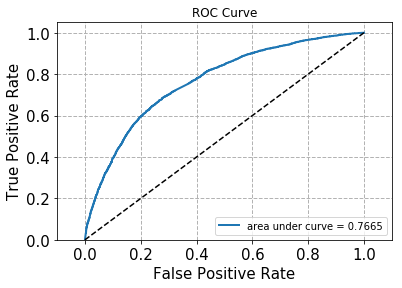

In [104]:
threshold = 3.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
NNMF_fpr = fpr
NNMF_tpr = tpr
plot_roc(fpr, tpr)

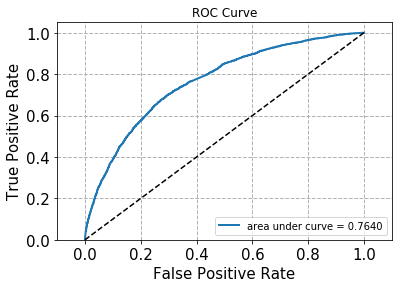

In [105]:
threshold = 3.5
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

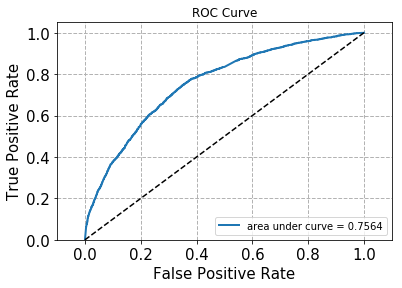

In [106]:
threshold = 4.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

## Question 23: 

In [108]:
movie_genre_set = pd.read_csv(movies_path, 
    names = ['movieid', 'title', 'genres'], 
    header = 0)
train_set, test_set = train_test_split(data, test_size = 0.1)

algo = NMF(n_factors = 20, biased = False)
algo.fit(train_set)
item_factors = algo.qi 

for k in range(0, 20, 1): 
    movies = item_factors[:, k]
    num_of_movies = len(movies)
    movie_tuple = []
    for n_movie in range(num_of_movies): 
        movie_tuple.append((n_movie, movies[n_movie]))
    movie_tuple.sort(key = lambda tup: tup[1], reverse = True)
    print("====== k : " + str(k))
    for top_index in movie_tuple[0:10]:
        print(movie_genre_set['genres'][top_index[0]])

    

====== k : 0
Drama
Drama|Romance
Drama|Thriller
Comedy|Drama|Romance
Crime|Film-Noir
Crime|Drama|Mystery|Romance|Thriller
Comedy
Comedy|Drama|Romance
Crime|Thriller
Crime|Drama|Mystery|Romance|Thriller
====== k : 1
Action|Crime|Drama|Sci-Fi|Thriller
Crime|Drama
Drama|Romance
Comedy
Comedy|Crime
Comedy|Romance
Comedy|Drama|Thriller
Comedy|Drama
Drama|Romance|War
Action|Comedy|Romance
====== k : 2
Comedy
Adventure|Western
Drama|Fantasy
Drama|Sci-Fi
Adventure|Fantasy|Thriller|IMAX
Crime|Drama
Adventure|Fantasy|Romance|Sci-Fi|Thriller
Action|Crime|Drama
Drama
Action|Adventure|Drama|Fantasy|Thriller
====== k : 3
Comedy|Drama
Crime|Film-Noir|Mystery
Drama
Action|Comedy|Crime|Drama
Comedy|Romance
Comedy
Drama|Horror|Mystery|Thriller
Drama
Drama
Action|Crime|Drama|Horror
====== k : 4
Action|Comedy|Crime|Thriller
Documentary
Comedy|Fantasy
Drama|Romance
Drama|Thriller
Comedy
Drama|Romance
Crime|Drama
Comedy|Horror|Mystery|Thriller
Action|Adventure|Fantasy|Sci-Fi
====== k : 5
Drama
Comedy|Drama|

## Question 24: 

In [109]:
full_mae_svd = []
full_rmse_svd = []
n_factors = range(2,51,2)
for i in n_factors:
    result = cross_validate(SVD(n_factors=i), data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
    full_mae_svd.append(np.mean(result['test_mae']))
    full_rmse_svd.append(np.mean(result['test_rmse']))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8674  0.8837  0.8664  0.8598  0.8554  0.8574  0.8681  0.8624  0.8726  0.8742  0.8667  0.0081  
MAE (testset)     0.6676  0.6782  0.6662  0.6630  0.6595  0.6615  0.6650  0.6619  0.6680  0.6703  0.6661  0.0051  
Fit time          1.38    1.49    1.49    1.43    1.45    1.43    1.42    1.45    1.51    1.46    1.45    0.04    
Test time         0.09    0.16    0.06    0.06    0.14    0.06    0.06    0.15    0.07    0.06    0.09    0.04    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8794  0.8539  0.8802  0.8609  0.8688  0.8610  0.8680  0.8603  0.8677  0.8669  0.8667  0.0079  
MAE (testset)     0.6755  0.6572  0.6756  0.6610  0.6684  0.6626  0.6670  0.6613  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8580  0.8690  0.8594  0.8659  0.8797  0.8689  0.8659  0.8710  0.8615  0.8578  0.8657  0.0065  
MAE (testset)     0.6566  0.6715  0.6569  0.6644  0.6777  0.6697  0.6607  0.6680  0.6589  0.6614  0.6646  0.0066  
Fit time          2.50    2.49    2.51    2.52    2.49    2.49    2.50    2.60    2.48    2.52    2.51    0.03    
Test time         0.06    0.13    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.07    0.02    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8658  0.8726  0.8670  0.8736  0.8522  0.8632  0.8589  0.8704  0.8667  0.8739  0.8664  0.0066  
MAE (testset)     0.6672  0.6721  0.6644  0.6703  0.6567  0.6618  0.6567  0.6685  0.6

## Question 25: 


In [110]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(full_rmse_svd)])
print("RMSE for best n_factors: %0.4f " %  np.min(full_rmse_svd))
print("Best n_factors for MAE: ", n_factors[np.argmin(full_mae_svd)])
print("MAE for best n_factors: %0.4f " % np.min(full_mae_svd))

Best n_factors for RMSE:  16
RMSE for best n_factors: 0.8648 
Best n_factors for MAE:  16
MAE for best n_factors: 0.6642 


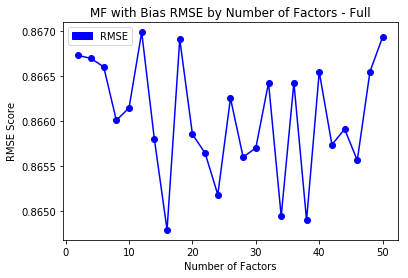

In [111]:
plt.plot(n_factors, full_rmse_svd, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("MF with Bias RMSE by Number of Factors - Full")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

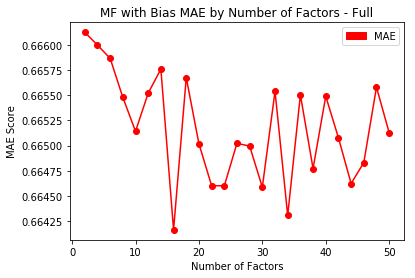

In [112]:
plt.plot(n_factors, full_mae_svd, 'r-o')
plt.xlabel('Number of Factors')
plt.ylabel('MAE Score')
plt.title("MF with Bias MAE by Number of Factors - Full")
red_patch = mpatches.Patch(color='red', label='MAE')
plt.legend(handles=[red_patch])
plt.show()

## Question 26-28

In [113]:
kf = KFold(n_splits=10)

pop_rmse_svd = []
pop_mae_svd = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = SVD(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in popular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    pop_rmse_svd.append(sum(rmse_score) / len(rmse_score))
    pop_mae_svd.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f\n' % (sum(rmse_score) /len(rmse_score)))
    

RMSE: 0.8555
MAE:  0.6545
RMSE: 0.8655
MAE:  0.6631
RMSE: 0.8576
MAE:  0.6609
RMSE: 0.8713
MAE:  0.6693
RMSE: 0.8515
MAE:  0.6530
RMSE: 0.8578
MAE:  0.6593
RMSE: 0.8610
MAE:  0.6633
RMSE: 0.8660
MAE:  0.6649
RMSE: 0.8560
MAE:  0.6598
RMSE: 0.8575
MAE:  0.6562

Number of Factors = 2
Average RMSE = 0.8600

RMSE: 0.8609
MAE:  0.6618
RMSE: 0.8546
MAE:  0.6577
RMSE: 0.8665
MAE:  0.6652
RMSE: 0.8453
MAE:  0.6516
RMSE: 0.8558
MAE:  0.6585
RMSE: 0.8608
MAE:  0.6603
RMSE: 0.8652
MAE:  0.6639
RMSE: 0.8629
MAE:  0.6639
RMSE: 0.8605
MAE:  0.6561
RMSE: 0.8609
MAE:  0.6597

Number of Factors = 4
Average RMSE = 0.8593

RMSE: 0.8589
MAE:  0.6630
RMSE: 0.8566
MAE:  0.6585
RMSE: 0.8547
MAE:  0.6590
RMSE: 0.8509
MAE:  0.6542
RMSE: 0.8665
MAE:  0.6611
RMSE: 0.8709
MAE:  0.6706
RMSE: 0.8471
MAE:  0.6483
RMSE: 0.8538
MAE:  0.6564
RMSE: 0.8606
MAE:  0.6598
RMSE: 0.8712
MAE:  0.6691

Number of Factors = 6
Average RMSE = 0.8591

RMSE: 0.8627
MAE:  0.6641
RMSE: 0.8485
MAE:  0.6539
RMSE: 0.8531
MAE:  0.6511
RMSE

In [114]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(pop_rmse_svd)])
print("RMSE for best n_factors: %0.4f " %  np.min(pop_rmse_svd))

Best n_factors for RMSE:  26
RMSE for best n_factors: 0.8575 


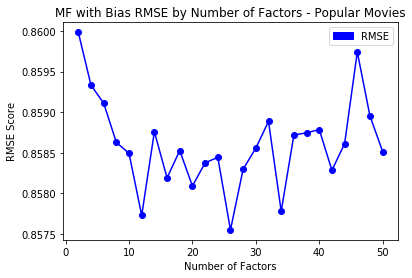

In [115]:
plt.plot(n_factors, pop_rmse_svd, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("MF with Bias RMSE by Number of Factors - Popular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [116]:
kf = KFold(n_splits=10)

unpop_rmse_svd = []
unpop_mae_svd = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = SVD(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpopular_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    unpop_rmse_svd.append(sum(rmse_score) / len(rmse_score))
    unpop_mae_svd.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f\n' % (sum(rmse_score) /len(rmse_score)))
    

RMSE: 1.0111
MAE:  0.7770
RMSE: 1.0024
MAE:  0.7845
RMSE: 0.9835
MAE:  0.7799
RMSE: 0.9341
MAE:  0.7345
RMSE: 0.9875
MAE:  0.7691
RMSE: 0.9823
MAE:  0.7585
RMSE: 0.9937
MAE:  0.7718
RMSE: 0.9608
MAE:  0.7497
RMSE: 0.9333
MAE:  0.7269
RMSE: 0.9660
MAE:  0.7713

Number of Factors = 2
Average RMSE = 0.9755

RMSE: 0.9415
MAE:  0.7387
RMSE: 0.9513
MAE:  0.7442
RMSE: 0.9962
MAE:  0.7920
RMSE: 0.9883
MAE:  0.7612
RMSE: 0.9655
MAE:  0.7575
RMSE: 0.9646
MAE:  0.7507
RMSE: 0.9410
MAE:  0.7202
RMSE: 0.9810
MAE:  0.7757
RMSE: 1.0547
MAE:  0.8153
RMSE: 0.9760
MAE:  0.7823

Number of Factors = 4
Average RMSE = 0.9760

RMSE: 0.9612
MAE:  0.7605
RMSE: 1.0055
MAE:  0.7693
RMSE: 0.9781
MAE:  0.7547
RMSE: 0.9320
MAE:  0.7201
RMSE: 0.9748
MAE:  0.7782
RMSE: 1.0053
MAE:  0.7770
RMSE: 0.9448
MAE:  0.7408
RMSE: 0.9737
MAE:  0.7683
RMSE: 1.0068
MAE:  0.7872
RMSE: 0.9531
MAE:  0.7575

Number of Factors = 6
Average RMSE = 0.9735

RMSE: 1.0200
MAE:  0.7904
RMSE: 0.9920
MAE:  0.7655
RMSE: 0.9614
MAE:  0.7456
RMSE

In [117]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(unpop_rmse_svd)])
print("RMSE for best n_factors: %0.4f " %  np.min(unpop_rmse_svd))

Best n_factors for RMSE:  18
RMSE for best n_factors: 0.9684 


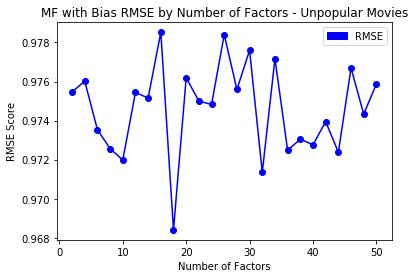

In [118]:
plt.plot(n_factors, unpop_rmse_svd, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("MF with Bias RMSE by Number of Factors - Unpopular Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

In [119]:
kf = KFold(n_splits=10)

var_rmse_svd = []
var_mae_svd = []

n_factors = range(2,51,2)

for i in n_factors:
    rmse_score = []
    mae_score = []
    algo = SVD(n_factors=i)
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in variance_movie]
        predictions = algo.test(trimset)
        rmse_score.append(accuracy.rmse(predictions, verbose=True))
        mae_score.append(accuracy.mae(predictions, verbose=True))
    var_rmse_svd.append(sum(rmse_score) / len(rmse_score))
    var_mae_svd.append(sum(mae_score)/len(mae_score))
    print('\nNumber of Factors = %d' % i)
    print('Average RMSE = %.4f\n' % (sum(rmse_score) /len(rmse_score)))
    

RMSE: 1.5387
RMSE: 1.4028
RMSE: 1.1594
RMSE: 1.6558
RMSE: 1.6779
RMSE: 1.4610
RMSE: 1.4999
RMSE: 1.1486
RMSE: 1.4643
RMSE: 1.6964

Number of Factors = 2
Average RMSE = 1.4705

RMSE: 1.4376
RMSE: 1.6837
RMSE: 1.5232
RMSE: 1.2001
RMSE: 1.5868
RMSE: 1.6621
RMSE: 1.5618
RMSE: 1.3566
RMSE: 1.3783
RMSE: 1.5426

Number of Factors = 4
Average RMSE = 1.4933

RMSE: 1.5737
RMSE: 1.3328
RMSE: 1.4854
RMSE: 1.4900
RMSE: 1.2590
RMSE: 1.6414
RMSE: 1.2819
RMSE: 1.4094
RMSE: 1.5599
RMSE: 1.6659

Number of Factors = 6
Average RMSE = 1.4700

RMSE: 1.6193
RMSE: 1.6407
RMSE: 1.4094
RMSE: 1.4429
RMSE: 1.6516
RMSE: 1.5834
RMSE: 1.4752
RMSE: 1.3238
RMSE: 1.5561
RMSE: 1.3301

Number of Factors = 8
Average RMSE = 1.5032

RMSE: 1.6048
RMSE: 1.3911
RMSE: 1.3374
RMSE: 1.5154
RMSE: 1.7048
RMSE: 1.0479
RMSE: 1.5615
RMSE: 1.4621
RMSE: 1.8074
RMSE: 1.3597

Number of Factors = 10
Average RMSE = 1.4792

RMSE: 1.2796
RMSE: 1.5800
RMSE: 1.4904
RMSE: 1.7712
RMSE: 1.3180
RMSE: 1.1399
RMSE: 1.4698
RMSE: 1.2120
RMSE: 1.7074
RM

In [120]:
print("Best n_factors for RMSE: ", n_factors[np.argmin(var_rmse_svd)])
print("RMSE for best n_factors: %0.4f " %  np.min(var_rmse_svd))

Best n_factors for RMSE:  30
RMSE for best n_factors: 1.4422 


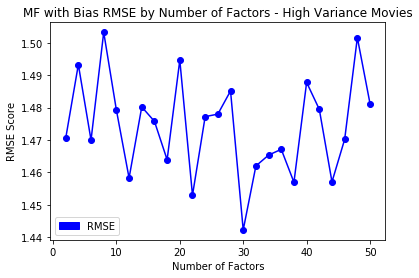

In [121]:
plt.plot(n_factors, var_rmse_svd, 'b-o')
plt.xlabel('Number of Factors')
plt.ylabel('RMSE Score')
plt.title("MF with Bias RMSE by Number of Factors - High Variance Movies")
blue_patch = mpatches.Patch(color='blue', label='RMSE')
plt.legend(handles=[blue_patch])
plt.show()

## Question 29: 

In [122]:
trainset, testset = train_test_split(data, test_size=.10)
algo = SVD(n_factors= 16)

algo.fit(trainset)
predictions = algo.test(testset)
actual_raw = [getattr(row, 'r_ui') for row in predictions]


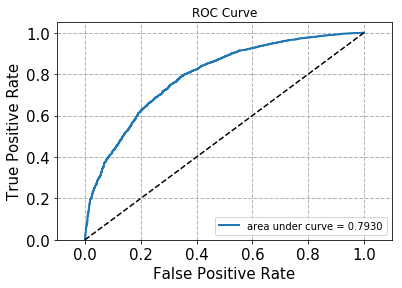

In [123]:
threshold = 2.5
actual = [1 if x > threshold else 0 for x in actual_raw]
predicted = [getattr(row, 'est') for row in predictions]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

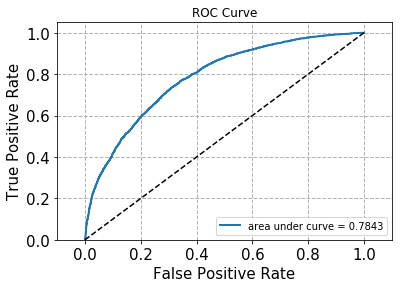

In [124]:
threshold = 3.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
MF_fpr = fpr
MF_tpr = tpr
plot_roc(fpr, tpr)

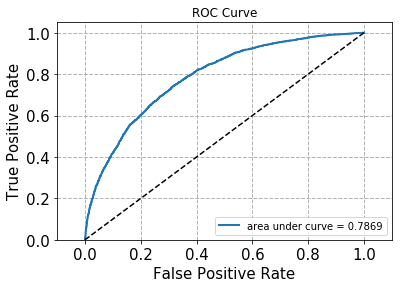

In [125]:
threshold = 3.5
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

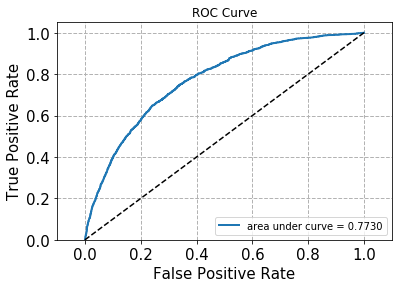

In [126]:
threshold = 4.0
actual = [1 if x > threshold else 0 for x in actual_raw]
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc(fpr, tpr)

## Question 30 - 33:

In [ ]:
user_ratings = {}
for row in data.raw_ratings:
    if row[0] not in user_ratings:
        user_ratings[row[0]]=[]
    user_ratings[row[0]].append(row[2])
user_avg_ratings={}
key = user_ratings.keys()
keylist=list(key)

In [ ]:
for i in range(len(user_ratings)):
    ratings = np.array(user_ratings[keylist[i]])
    user_avg_ratings[keylist[i]]=np.mean(ratings)

kf = KFold(n_splits=10, random_state=None, shuffle=False)
rmse=[]
for train_test, test_index in kf.split(dataset):
    pred_results=[]
    test_results = dataset.loc[test_index]['rating'].as_matrix()
    for index in test_index:
        user_id = str(int(dataset.loc[index]['userId']))
        pred_results.append(user_avg_ratings[user_id])
    rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print("Average RMSE for All Movies: ", avg_rmse)

kf = KFold(n_splits = 10, random_state = None, shuffle = False)
rmse = []
p_movie = []
for i in popular_movie: 
    p_movie.append(int(i))
up_movie = []
for i in unpopular_movie: 
    up_movie.append(int(i))
high_var_movie = []
for i in variance_movie: 
    high_var_movie.append(int(i))
    
for train_test, test_index in kf.split(dataset): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in p_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for Popular Movies:: ' + str(avg_rmse))

for train_test, test_index in kf.split(dataset): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in up_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for Unpopular Movies: ' + str(avg_rmse))

for train_test, test_index in kf.split(dataset): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in high_var_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for High Variance Movies: ' + str(avg_rmse))


In [ ]:
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
rmse = []
for train_test, test_index in kf.split(movie_ratings): 
    pred_results = []
    test_results = dataset.loc[test_index]['rating'].as_matrix()
    for index in test_index: 
        user_id = str(int(dataset.loc[index]['userId']))
        pred_results.append(user_avg_ratings[user_id])
    rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for All Movies: ' + str(avg_rmse))

kf = KFold(n_splits = 10, random_state = None, shuffle = False)
rmse = []
p_movie = []
for i in popular_movie: 
    p_movie.append(int(i))
up_movie = []
for i in unpopular_movie: 
    up_movie.append(int(i))
high_var_movie = []
for i in variance_movie: 
    high_var_movie.append(int(i))
    
for train_test, test_index in kf.split(movie_ratings): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in p_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for Popular Movies: ' + str(avg_rmse))

for train_test, test_index in kf.split(movie_ratings): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in up_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for Unpopular Movies: ' + str(avg_rmse))

for train_test, test_index in kf.split(movie_ratings): 
    pred_results = []
    trimmed_index = []
    for index in test_index: 
        if index in high_var_movie: 
            trimmed_index.append(index)
    trimmed_index = np.asarray(trimmed_index)
    if (len(trimmed_index) > 0): 
        test_results = dataset.loc[trimmed_index]['rating'].as_matrix()
        #print(test_results)
        for index in trimmed_index: 
            user_id = str(int(dataset.loc[index]['userId']))
            pred_results.append(user_avg_ratings[user_id])
        rmse.append(sqrt(mean_squared_error(test_results, pred_results)))
avg_rmse = np.mean(rmse)
print('Average RMSE for High Variance Movies: ' + str(avg_rmse))

## Question 34: 


In [130]:
def plot_roc_all(fpr, tpr):
    fig, ax = plt.subplots()
    if (len(fpr) or len(tpr)) >= 3:
        labels = ['kNN', 'NNMF', 'MF w/ bias']
        for f, t, l in zip(fpr, tpr, labels):
            roc_auc = auc(f,t)

            ax.plot(f, t, lw=2, label= '%s area under curve = %0.4f' % (l, roc_auc))

            ax.grid(color='0.7', linestyle='--', linewidth=1)

            ax.set_xlim([-0.1, 1.1])
            ax.set_ylim([0.0, 1.05])
            plt.plot([0, 1], [0, 1],'k--')
        ax.set_title('ROC Curve')
        ax.set_xlabel('False Positive Rate',fontsize=15)
        ax.set_ylabel('True Positive Rate',fontsize=15)

        ax.legend(loc="lower right")

        for label in ax.get_xticklabels()+ax.get_yticklabels():
            label.set_fontsize(15)
    else:
        roc_auc = auc(fpr,tpr)

        ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

        ax.grid(color='0.7', linestyle='--', linewidth=1)

        ax.set_xlim([-0.1, 1.1])
        ax.set_ylim([0.0, 1.05])
        plt.plot([0, 1], [0, 1],'k--')
        ax.set_title('ROC Curve')
        ax.set_xlabel('False Positive Rate',fontsize=15)
        ax.set_ylabel('True Positive Rate',fontsize=15)

        ax.legend(loc="lower right")

        for label in ax.get_xticklabels()+ax.get_yticklabels():
            label.set_fontsize(15)
    plt.show()

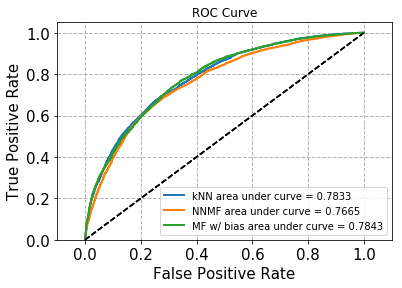

In [131]:
combined_fpr = [kNN_fpr, NNMF_fpr, MF_fpr]
combined_tpr = [kNN_tpr, NNMF_tpr, MF_tpr]
plot_roc_all(combined_fpr, combined_tpr)


## Question 36-38: 


In [132]:
def getTrimmedTest(untrimmed_test, t, threshold=3):
    temp_trimmed_test = {}
    trimmed_test_users = []
    trimmed_test = []
    for (user, movId, rating) in untrimmed_test:
        if (user not in temp_trimmed_test) and (rating >= threshold):
            temp_trimmed_test[user] = 0
            temp_trimmed_test[user] += 1
        elif rating >= threshold:
            temp_trimmed_test[user] += 1
            
    for user, count in temp_trimmed_test.items():
        if count >= t:
            trimmed_test_users.append(user)
        
    for (user, movId, rating) in untrimmed_test:
        if user in trimmed_test_users:
            trimmed_test.append((user, movId, rating))
    
    
    return trimmed_test


def prec_rec(model, data, t, splits=10, threshold=3):
    precision = []
    recall = []
    kf = KFold(n_splits=splits)
    for t in t:
        temp_precision = [] 
        temp_recall = [] 
        for train, test in kf.split(data): 
            model.fit(train)
            trimset = getTrimmedTest(test, t)
            prediction = model.test(trimset)
            user_truepred = {}
            for user, _, truerating, predictedrating, _ in prediction:
                if user not in user_truepred:
                    user_truepred[user] = []
                user_truepred[user].append([truerating, predictedrating])
                
            user_pre = []
            user_rec = []
            for ratings in user_truepred.values():
                ratings_sorted = sorted(ratings, reverse=True)
                SintG_count = 0
                G_length = len(np.array(ratings)[:,0])
                for i in range(t):
                    if ratings_sorted[i][1] > threshold:
                        SintG_count += 1
                user_precision = float(SintG_count)/t
                user_recall = float(SintG_count)/G_length
                user_pre.append([user_precision])
                user_rec.append([user_recall])
            temp_precision.append([np.mean(user_pre)])
            temp_recall.append([np.mean(user_rec)])
        precision.append(np.mean(temp_precision))
        recall.append(np.mean(temp_recall))
    
    return precision, recall

In [133]:
%%capture
t = list(range(1,26))
kNN_model = KNNWithMeans(k=20, sim_options=sim_options)
NMMF_model = NMF(n_factors=22)
MF_model = SVD(n_factors=16)

kNN_precision, kNN_recall = prec_rec(kNN_model, data, t)
NMMF_precision, NMMF_recall = prec_rec(NMMF_model, data, t)
MF_precision, MF_recall = prec_rec(MF_model, data, t)


In [134]:
def q_t_plot(precision, recall, t, label=None, multi=False):
    if multi:
        lab = ['kNN', 'NNMF', 'MF']
        for p, l in zip(precision, lab):
            plt.plot(t, p, label=l)
        plt.xlabel("t")
        plt.ylabel("Precision")
        plt.grid()
        plt.title("%s - Precision vs. t" % label)
        plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
        plt.show()
        for r, l in zip(recall, lab):
            plt.plot(t, r, label=l)
        plt.xlabel("t")
        plt.ylabel("Recall")
        plt.grid()
        plt.title("%s - Recall vs. t" % label)
        plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
        plt.show()
        for r, p, l in zip(recall, precision, lab):
            plt.plot(r, p, label=l)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.grid()
        plt.title("%s - Precision vs. Recall" % label)
        plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
        plt.show()
    else:
        plt.figure()
        plt.plot(t, precision)
        plt.xlabel("t")
        plt.ylabel("Precision")
        plt.grid()
        plt.title("%s - Precision vs. t" % label)
        plt.show()
        plt.figure()
        plt.plot(t, recall)
        plt.xlabel("t")
        plt.ylabel("Recall")
        plt.grid()
        plt.title("%s - Recall vs. t" % label)
        plt.show()
        plt.figure()
        plt.plot(recall, precision)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.grid()
        plt.title("%s - Precision vs. Recall" % label)
        plt.show()
    


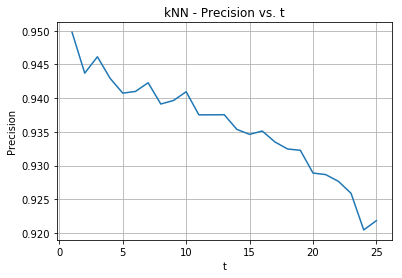

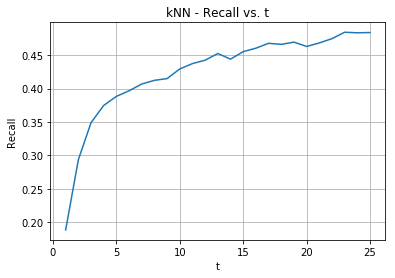

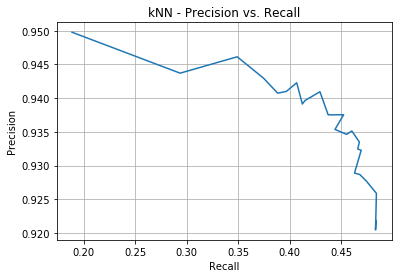

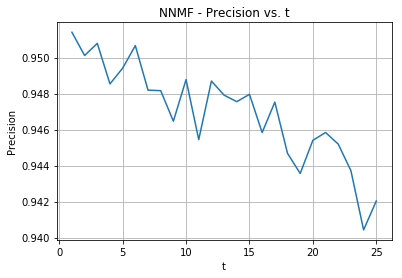

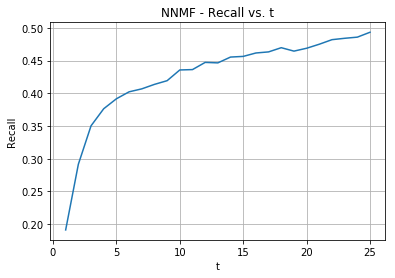

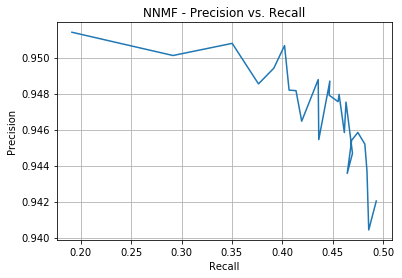

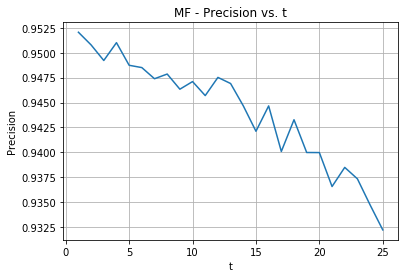

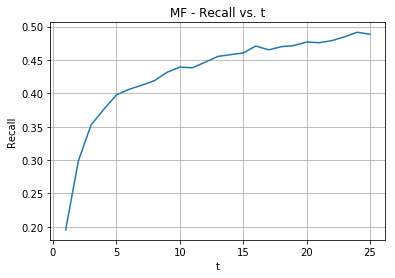

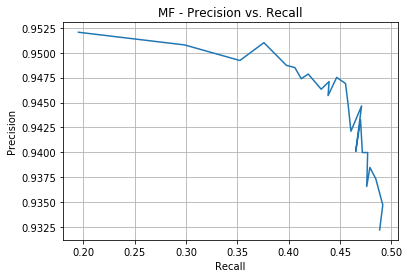

In [135]:
t = np.linspace(1,25, 25)
q_t_plot(kNN_precision, kNN_recall, t, label='kNN')
q_t_plot(NMMF_precision, NMMF_recall, t, label='NNMF')
q_t_plot(MF_precision, MF_recall, t, label='MF')

## Question 39: 
Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NNMF, and MF with bias predictions.

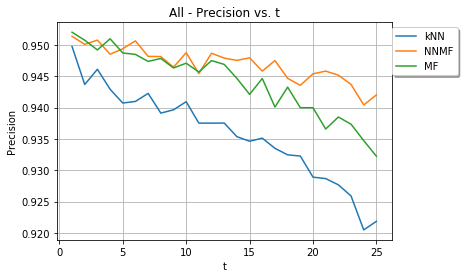

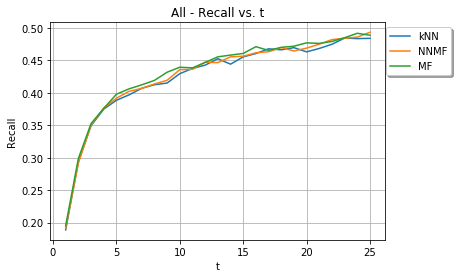

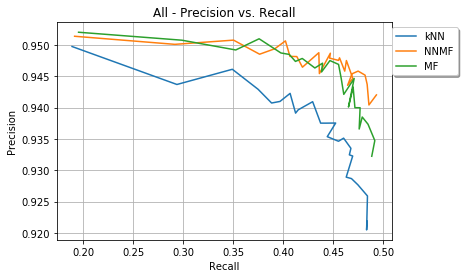

In [136]:
all_precision = [kNN_precision, NMMF_precision, MF_precision]
all_recall = [kNN_recall, NMMF_recall, MF_recall]
q36_38plot(all_precision, all_recall, t, multi=True, label='All')